<a href="https://colab.research.google.com/github/Akasonal/Bike-Share-Count/blob/main/Bike_sharing_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the  file

In [ ]:
df_train=pd.read_csv("TRAIN.csv")
df_train.head()

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78


In [ ]:
df_test=pd.read_csv("TEST.csv")
df_test.head()

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,20/09/2018,0,20.1,58,0.3,2000,11.5,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,1,20/09/2018,1,20.0,59,1.1,1999,11.7,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,2,20/09/2018,2,19.9,64,1.5,1755,12.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,3,20/09/2018,3,19.6,72,1.7,1140,14.4,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,4,20/09/2018,4,19.6,74,1.4,847,14.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## Data Understanding and visualization

In [ ]:
df_train.shape    #number of rows and columns present in dataset

(7032, 15)

In [ ]:
df_train.columns   #column index present in dataset

Index(['Index', 'Date', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rented Bike Count'],
      dtype='object')

In [ ]:
df_train.isnull().values.any()   #is there any null value present in dataset

False

In [ ]:
df_train.isnull().values.any()   #is there any null value present in test set

False

In [ ]:
df_train.dtypes    #datatype of each columns present in dataset

Index                          int64
Date                          object
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
Rented Bike Count              int64
dtype: object

In [ ]:
df_train.describe()           # statistical description of float and int datatype

,Index,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3515.500000,11.500000,13.154778,58.164960,1.785708,1421.082480,4.323905,0.590294,0.152645,0.076024,689.143203
std,2030.107879,6.922679,12.997927,20.637447,1.053112,613.169137,14.178857,0.893909,1.165239,0.403487,652.151786
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,1757.750000,5.750000,1.800000,42.000000,1.000000,918.750000,-6.700000,0.000000,0.000000,0.000000,189.750000
50%,3515.500000,11.500000,15.500000,57.000000,1.600000,1665.000000,6.900000,0.020000,0.000000,0.000000,444.000000
75%,5273.250000,17.250000,24.000000,74.000000,2.400000,1996.000000,16.500000,0.950000,0.000000,0.000000,1035.000000
max,7031.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000,3556.000000


In [ ]:
cat_df=df_train.dtypes[df_train.dtypes=='object']
cat_df.describe()   #statistical description of categorical variable

count          4
unique         1
top       object
freq           4
dtype: object

## Data Visualization

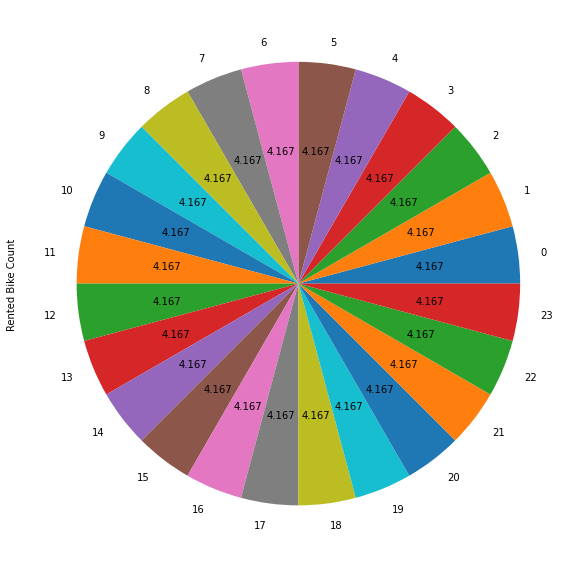

In [ ]:
plt.figure(figsize=(10,8))
df_train.groupby(["Hour"])["Rented Bike Count"].count().plot(kind="pie",autopct="%0.3f")
plt.tight_layout()

Hour is not a constrain for bike rental as we see the each hour has been possesing equal contribution

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


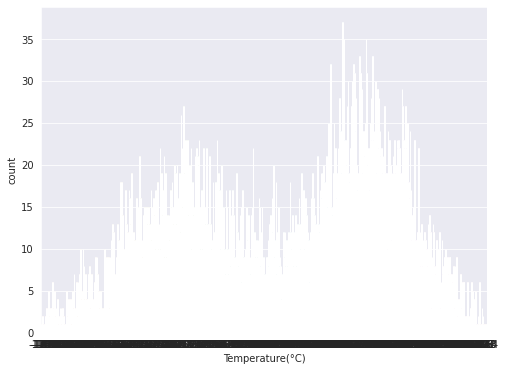

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.countplot("Temperature(°C)",data=df_train)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


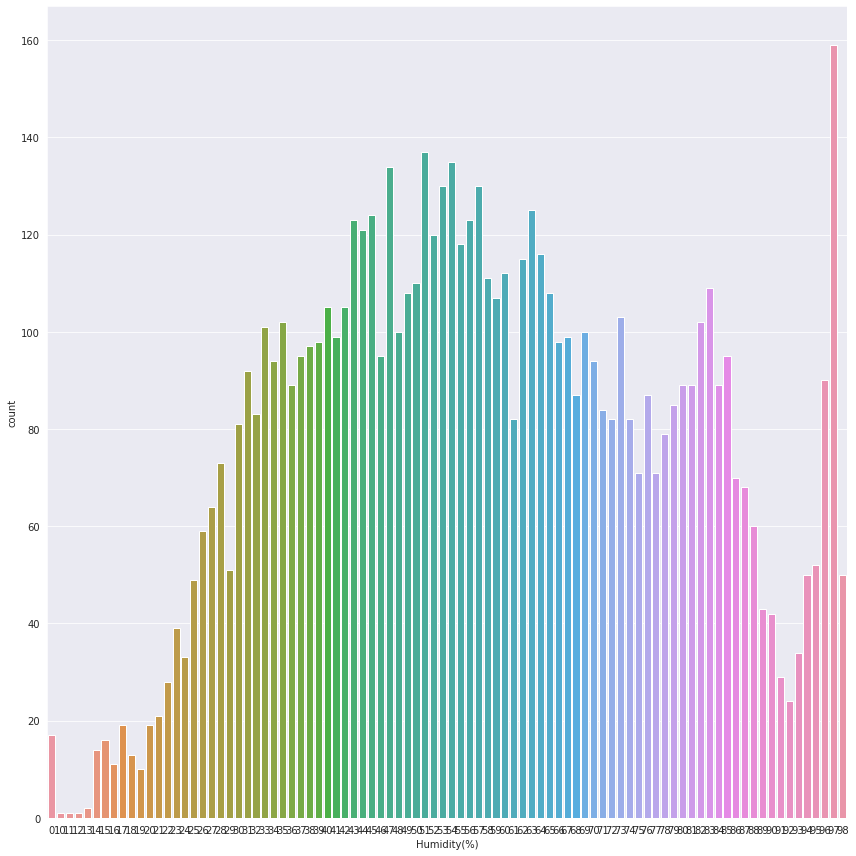

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,12))
sns.countplot("Humidity(%)",data=df_train)
plt.tight_layout()
plt.show()

Lesser will be the humidity more bike will be rented by customer

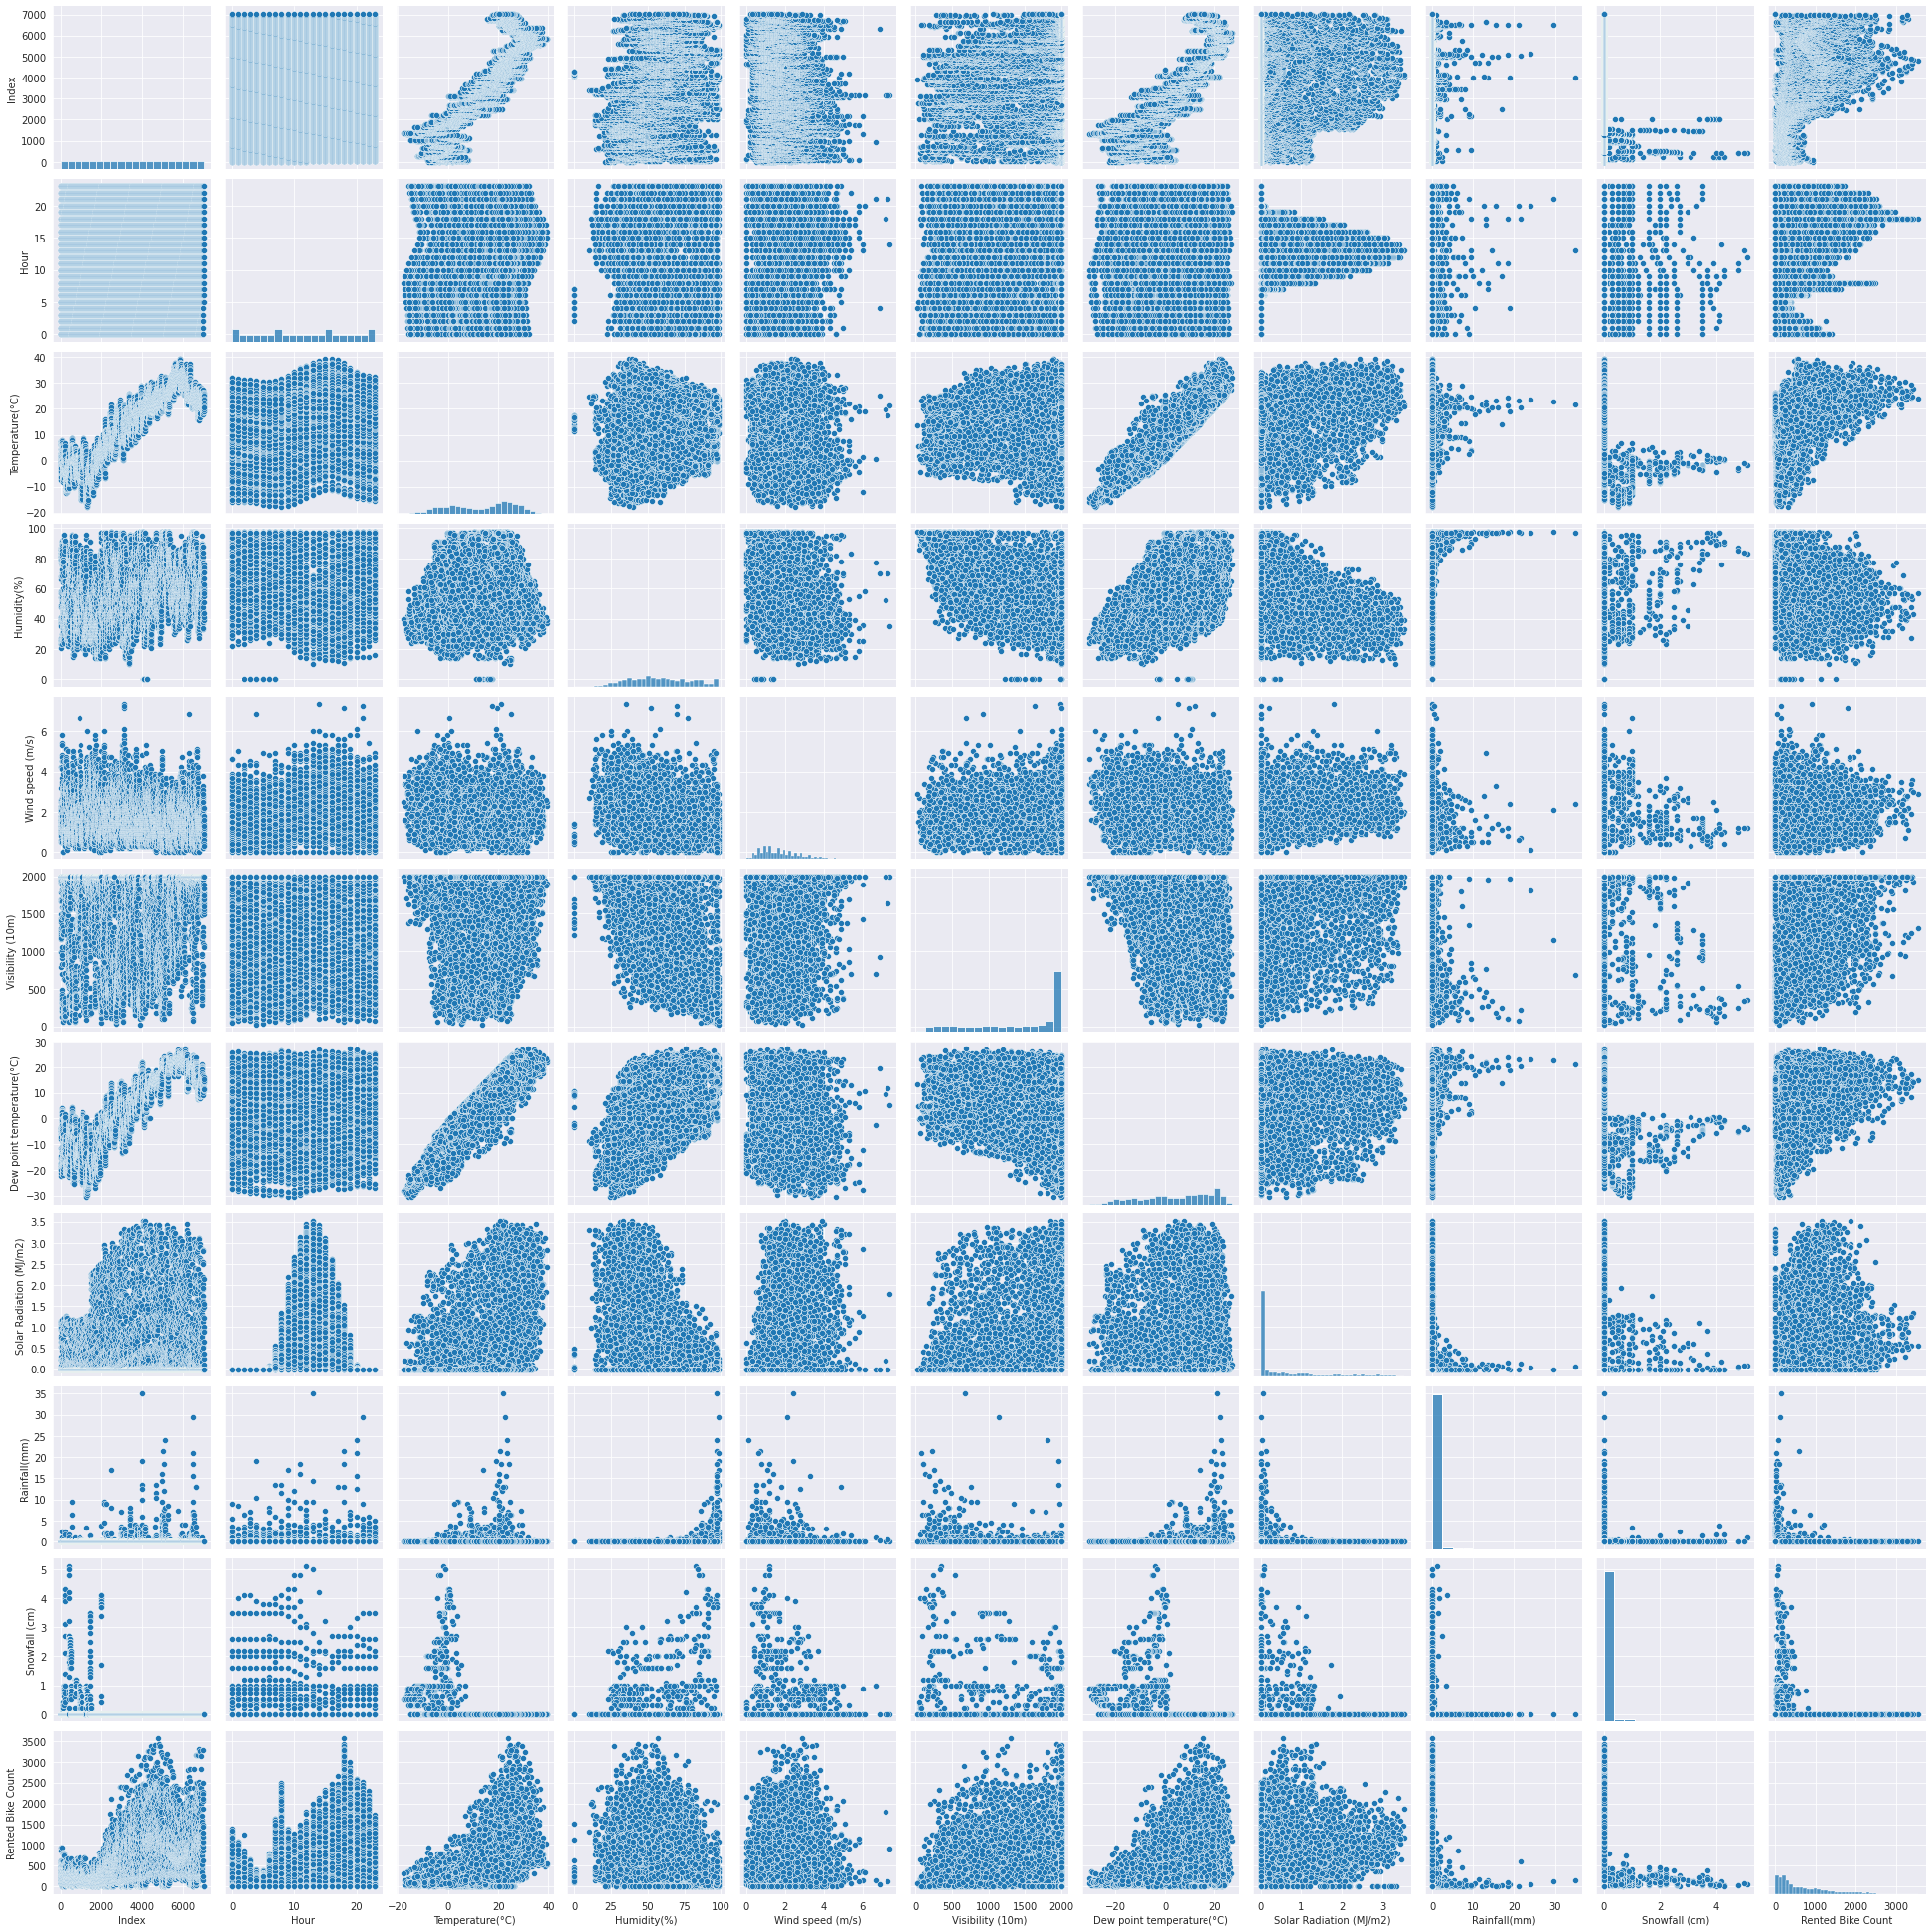

In [ ]:
sns.pairplot(df_train)

As we see above figure one thing is clear that data is not linearly seperable hence in that case lnear algorithm will not work as we see data is overlapping more and more hence algorithmm like kernel svm and KNN has large scope to give better prediction result hence during our model selection we avoid to take linear model like linearregression and linear svm.

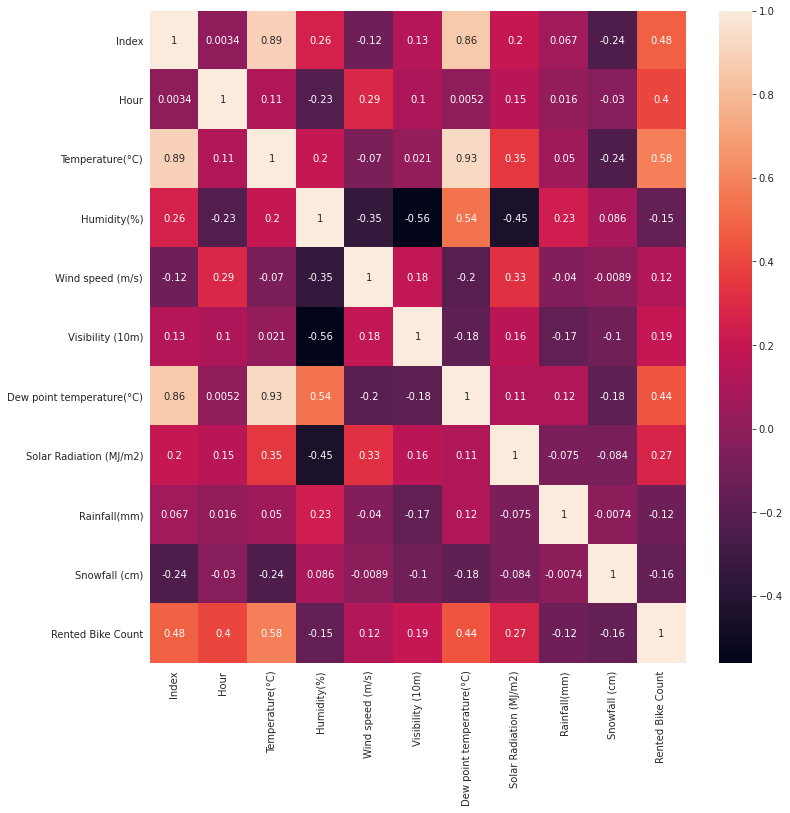

In [ ]:
#plotting correlation matrix to check correlation between dataset
sns.set_style("darkgrid")
plt.figure(figsize=(12,12))
sns.heatmap(df_train.corr(),annot=True,annot_kws={"size":10})
plt.show()

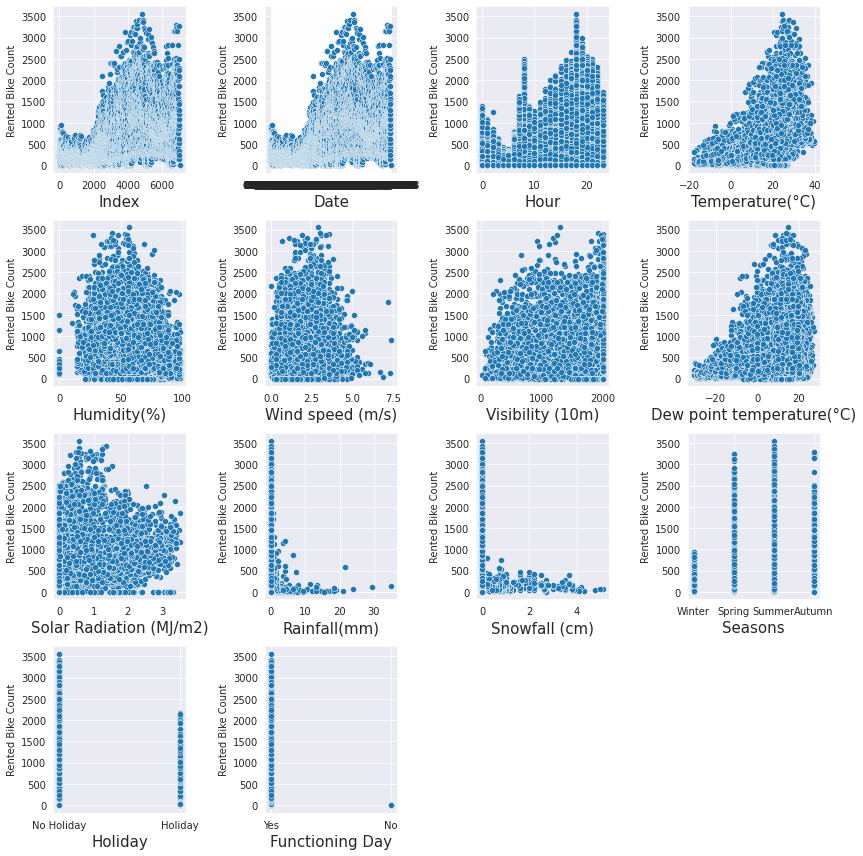

In [ ]:
#plotting target variable in refrence with all the independent variables
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,12))
j=1
for i in df_train.columns:
  if i!="Rented Bike Count":
    if j<=len(df_train.columns):
      plt.subplot(4,4,j)
      sns.scatterplot(df_train[i],df_train["Rented Bike Count"])
      plt.xlabel(i,fontsize=15)
  j+=1
plt.tight_layout()
plt.show()

## Feature Engineering
Let's do some feature engineering to convert categorical features in numerical features

## checking categorical features in dataset

In [ ]:
cat_df={}
for i in df_train.columns:
  if df_train[i].dtypes=="object":
    cat_df[i]=len(df_train[i].unique())
print(cat_df)

{'Seasons': 4, 'Holiday': 2, 'Functioning Day': 2}


In [ ]:
list_train=list(cat_df.keys())
list_train
cat_df=df_train[list_train]
cat_df.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


what ??? Date has 293 unique values as datetime feature won't impact the bike rental hence we will drop this features

In [ ]:
cat_test_df={}
for j in df_test.columns:
  if df_test[j].dtypes=="object":
    cat_test_df[j]=len(df_test[j].unique())
print(cat_test_df)

{'Seasons': 1, 'Holiday': 2, 'Functioning Day': 2}


In [ ]:
list_test=list(cat_test_df.keys())
list_test
cat_test_df=df_test[list_train]
cat_test_df.head()

,Seasons,Holiday,Functioning Day
0,Autumn,No Holiday,Yes
1,Autumn,No Holiday,Yes
2,Autumn,No Holiday,Yes
3,Autumn,No Holiday,Yes
4,Autumn,No Holiday,Yes


## Encoding all these categorical features into numerical features

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#encoding of train set
label_encoder=LabelEncoder()
for i in df_train.columns:
  if df_train[i].dtypes=="object":
    df_train[i]=label_encoder.fit_transform(df_train[i])
df_train=df_train.drop(["Index"],axis=1)

In [ ]:
df_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,78


In [ ]:
label_encoder=LabelEncoder()
for i in df_test.columns:
  if df_test[i].dtypes=="object":
    df_test[i]=label_encoder.fit_transform(df_test[i])
df_test=df_test.drop(["Index"],axis=1)

In [ ]:
df_test.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,20.1,58,0.3,2000,11.5,0.0,0.0,0.0,0,1,1
1,1,20.0,59,1.1,1999,11.7,0.0,0.0,0.0,0,1,1
2,2,19.9,64,1.5,1755,12.8,0.0,0.0,0.0,0,1,1
3,3,19.6,72,1.7,1140,14.4,0.0,0.0,0.0,0,1,1
4,4,19.6,74,1.4,847,14.8,0.0,0.0,0.0,0,1,1


In [ ]:
#checking null values for train and test set after encoding into numerical variables
print(df_train.isnull().values.any())
print(df_test.isnull().values.any())

False
False


## Pre Modeling Steps

In [ ]:
#splitting dataset into train and test set 
from sklearn.model_selection import train_test_split
X=df_train.iloc[:,:-1]
Y=df_train.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)
print(Y_train.shape)

(5625, 12)
(5625,)


In [ ]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [ ]:
models=[]
models.append(("RF",RandomForestRegressor()))
models.append(("SVM",SVR(kernel="rbf")))
models.append(("CART",DecisionTreeRegressor()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("XGB",XGBRegressor()))
names=[]
scores=[]
for name,model in models:
  kfold=KFold(n_splits=5,shuffle=True,random_state=True)
  score=cross_val_score(model,X_train,Y_train,cv=kfold,n_jobs=-1)
  names.append(name)
  scores.append(score)
  print(f"model {name} has mean score : {score.mean()} and deviation in accuracy : {score.std()}")


model RF has mean score : 0.8713072226149213 and deviation in accuracy : 0.010059248689246614
model SVM has mean score : -0.09551342709335446 and deviation in accuracy : 0.011861484725829806
model CART has mean score : 0.7535919961731541 and deviation in accuracy : 0.012576084308562963
model KNN has mean score : 0.5834095288799154 and deviation in accuracy : 0.013593014710450995
model XGB has mean score : 0.8593085220089284 and deviation in accuracy : 0.009485412384800598


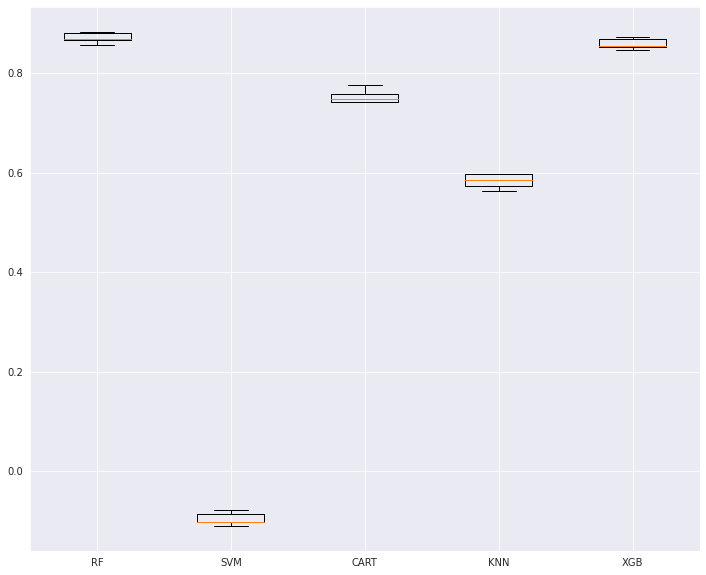

In [ ]:
plt.figure(figsize=(12,10))
plt.boxplot(scores,labels=names)
plt.show()

Best possible Resut we are getting from Random forest hence we will use Random Forest for furthur prediction of model

In [ ]:
## Printing importnat featurte using Feature importances
model=RandomForestRegressor()
model.fit(X_train,Y_train)
importances=np.sort(model.feature_importances_)
print(importances)

[0.00040174 0.00171282 0.00704313 0.01627511 0.01689177 0.03157397
 0.03515454 0.0501384  0.07190561 0.09445001 0.2788666  0.39558629]


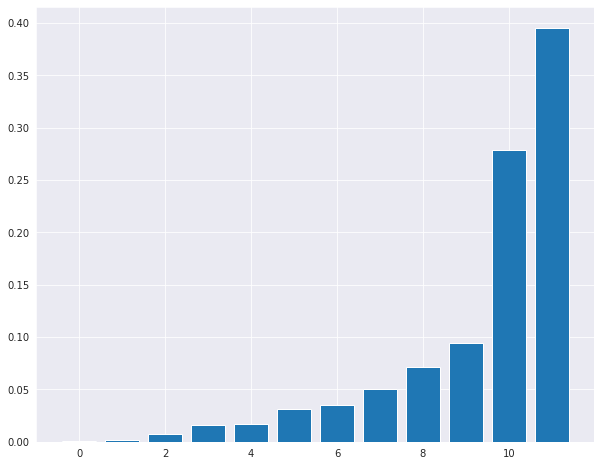

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
plt.bar([x for x in range(len(importances))], importances)
plt.show()

## Applying hyperparameter tuning to predict better result

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={"n_estimators":[100,120,140,150],
            "criterion":["mse","mae"],
            "min_samples_split":[2,5,7,8]
           }

In [ ]:
random_cv=RandomizedSearchCV(RandomForestRegressor(),param_distributions=param_grid,cv=5,n_jobs=-1)
random_cv.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
random_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
random_cv.best_params_

{'criterion': 'mse', 'min_samples_split': 7, 'n_estimators': 100}

In [ ]:
random_cv.best_score_

0.8745345130103555

In [ ]:
model=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

## Prediction on final Test set

In [ ]:
prediction=model.predict(df_test)

In [ ]:
prediction=prediction.round(0)
prediction

array([857., 714., 553., ..., 532., 460., 346.])

In [ ]:
output=pd.DataFrame(prediction,index=range(1728))

In [ ]:
output.to_csv("output.csv")

In [ ]:
output.head()

,0
0,857.0
1,714.0
2,553.0
3,270.0
4,200.0


In [ ]:
len(output)

1728

In [ ]:
import pickle
with open("bikeshareCount.pkl","wb") as f:
  pickle.dump(model,f)

In [ ]:
X_train.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
X_train["Snowfall (cm)"].max()

5.0